In [1]:
import os
import glob
import numpy as np
from astropy.io import fits
from photutils import DAOStarFinder, CircularAperture
import matplotlib.pyplot as plt
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from scipy.signal import peak_widths
import astropy.units as u

from calibFuncs import sortData, starLocate, calcBinDist

In [2]:
datadir = 'C:\\Users\\willi\\Dropbox (Amherst College)\\Research\\Follette-Lab\\Thesis-Data\William\\trapezium_data\\nirc2-trapezium'
NIRC2_datasets = sortData(datadir, instrument='NIRC2', filesufx='*.fit*')

In [3]:
# group similarly orientated datasets

# ThetaOri_2016-08-20_srcs
# trap_astrom_2005-02-25_srcs
# trapezium_2005-02-16_srcs
wide1 = NIRC2_datasets[2]
wide2 = NIRC2_datasets[3]
wide3 = NIRC2_datasets[12]
wides = wide1+wide2+wide3

first, find a reference star to create a reference PSF


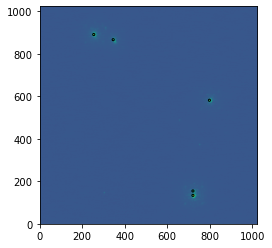

    xcentroid         ycentroid           roundness1     
----------------- ------------------ --------------------
721.1303456842767   133.340526134301 0.034316981269904026
721.1483916293412 154.13529081470344 0.019184581208187904
798.8744647300624  581.2827275555245 0.012592257297224053
345.5758214343682  866.5895894907349  0.10874023919503405
253.9926640257016  890.8933012436736 -0.08407427941692532
input the 0 indexed integer of your target from the table above: 4
target star is at  253 , 890  at FWHM 5.049670221595818
next, select your target system to fit positions to


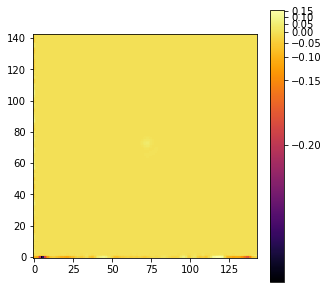

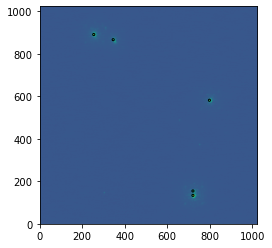

    xcentroid         ycentroid           roundness1     
----------------- ------------------ --------------------
721.1303456842767   133.340526134301 0.034316981269904026
721.1483916293412 154.13529081470344 0.019184581208187904
798.8744647300624  581.2827275555245 0.012592257297224053
345.5758214343682  866.5895894907349  0.10874023919503405
253.9926640257016  890.8933012436736 -0.08407427941692532
input the 0 indexed integer of your target from the table above: 3
target star is at  345 , 866  at FWHM 4.830086606794055
       x_0              x_fit              y_0        ... pixscale    date   
----------------- ----------------- ----------------- ... -------- ----------
81.51120274978005 80.79479796029908 66.52133885450797 ... 0.009952 2005-02-25
75.58354282137127 74.38845025930219 75.57169582535954 ... 0.009952 2005-02-25
37.92791211486332 36.75314707747577 130.1207753484104 ... 0.009952 2005-02-25


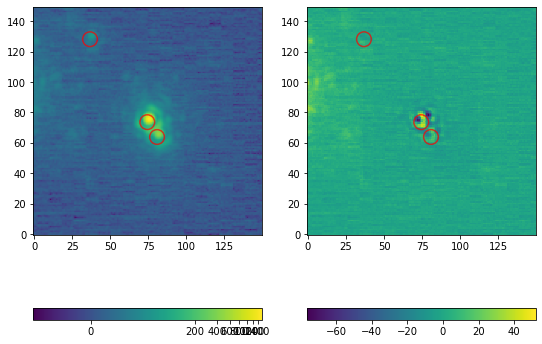

In [4]:
phot_results = starLocate(wide2[0], 100, 5, 5, stampsize=150, roundness=0.3)
print(phot_results)

In [5]:
phot_results

x_0,x_fit,y_0,y_fit,flux_0,flux_fit,id,group_id,flux_unc,x_0_unc,y_0_unc,iter_detected,pixscale,date
float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,int32,float64,str10
81.51120274978005,80.79479796029908,66.52133885450797,63.91005481343672,25293.176125421185,11860.422058734015,1,1,37.903232895558936,0.009640298118557869,0.009375944789488779,1,0.009952,2005-02-25
75.58354282137127,74.38845025930219,75.57169582535954,73.66928171964885,49183.16972253219,41694.05780440506,2,1,37.90944137806469,0.002739958244412083,0.002661895285288668,1,0.009952,2005-02-25
37.92791211486332,36.75314707747577,130.1207753484104,128.14103336342558,2009.9210859226664,1636.7018933249724,3,2,35.4391993017861,0.06576698814632921,0.06395132715436873,1,0.009952,2005-02-25


In [6]:
calcBinDist(phot_results)

116.18029788449913 mas +/- 0.09581515147563645 mas
658.9086680241328 mas +/- 0.874916141094547 mas


TypeError: only dimensionless scalar quantities can be converted to Python scalars